In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# <a id='1'>1. Load Libraries and read the data<a>

## <a id='1.1'>1.1. Load libraries Pandas, Numpy and Matplotlib</a> 

In [3]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## <a id='1.2'>1.2 Read Data </a>

In [4]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

# Overview

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



1. ## <a id='2.1'>2.1 Head and Overview of the Data</a>

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### What are these columns signifying?

This datasets consist of eight medical predictor (independent) variables and one target (dependent) variable, Outcome Class variable whether paitent has diabetes or not (encoded as 0 or 1). Predictor variables are  includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
* Pregnancies - Number of times Pregnant. 
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 
* BloodPressure - Diastolic blood pressure (mm Hg).
* SkinThickness - Triceps skin fold thickness (mm).
* Insulin - 2-Hour serum insulin (mu U/ml).
* BMI - Body mass index ( BMI weight in kg/(height in m)^2).
* DiabetesPedigreeFunction - Diabetes pedigree function.
* Age - Age in year.
* Outcome - 1 if Patient has diabetes, 0 otherwise.

### What is DiabetesPedigreeFunction Column signifying?
A function which scores the likelihood of diabetes based on family history. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset has 768 entries and 9 colums(8 Predictor variables and 1 Target variable). Only BMI and DaiabetesPedigreeFunction are floating numbers, rest are integers.

## <a id='2.2'> 2.2 Exploring Data</a>

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


No Data seems to missing

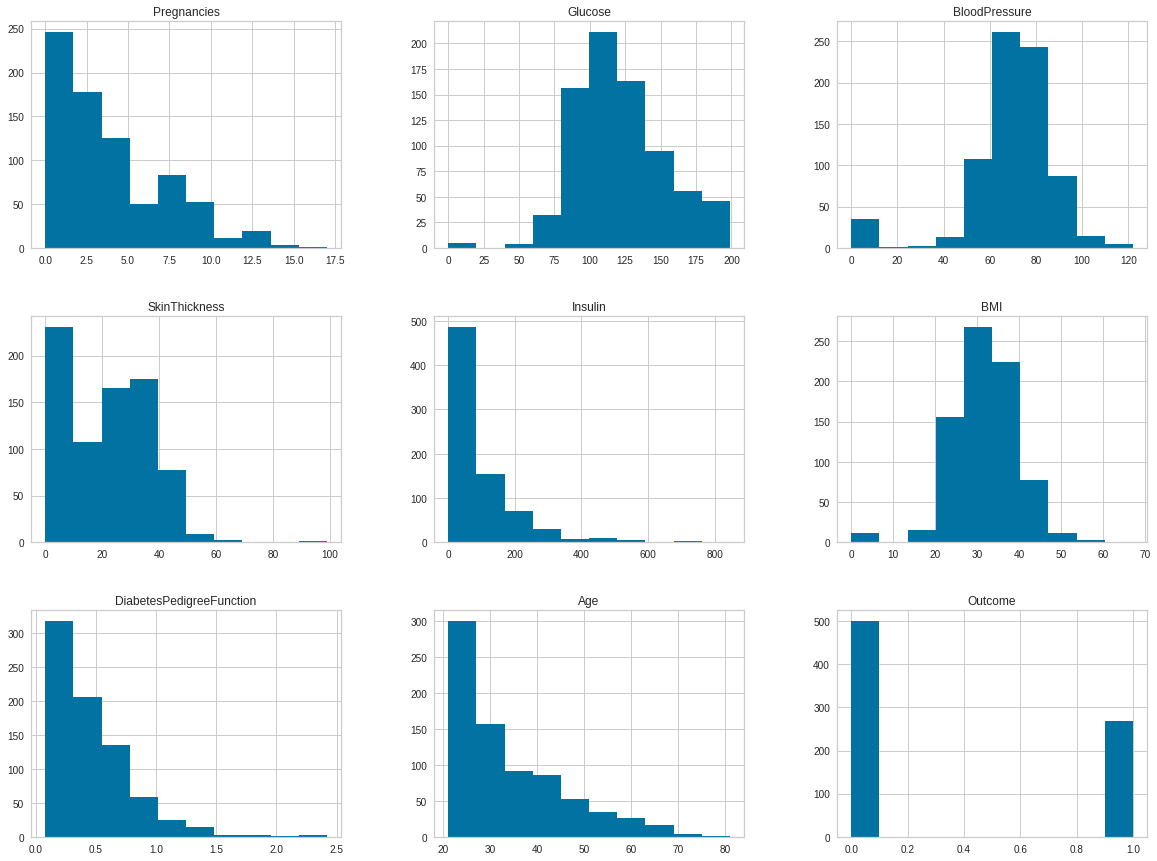

In [13]:
data.hist(bins=10, figsize=(20, 15));